<a href="https://colab.research.google.com/github/kinfilax/task-4/blob/main/Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
data1 = pd.read_csv('/content/gdrive/My Drive/college_1.csv')
data2 = pd.read_csv('/content/gdrive/My Drive/college_2.csv')
data = pd.concat([data1, data2])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [8]:
Exceeded = data[(data['CodeKata Score'] > 15000)]
Exceeded.to_csv("Reached_expectations.csv")

In [9]:
data.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising', 'python_en', 'computational_thinking'],
      dtype='object')

In [12]:
reached = data[(data['CodeKata Score'] > 10000) & (data['CodeKata Score'] < 15000)]
reached.to_csv("Reached_expectations.csv")

In [13]:
Needs = data[(data['CodeKata Score'] < 7000) & (data['CodeKata Score'] < 10000)]
Needs.to_csv("Needs_Improvement.csv")

###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [14]:
Unsatisfactory = data[(data['CodeKata Score']< 7000)]
Unsatisfactory.to_csv("Unsatisfactory.csv")

In [15]:
Unsatisfactory

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
8,J.SUGANTHI,27.0,50.00,5860,5860,Electronics and Communication Engineering,0,NaN,NaN
9,thamizhpaana,29.0,0.00,5500,5500,Computer Science and Engineering,0,NaN,NaN
10,Iyappan Samiraj,50.0,24.00,5400,5400,Electronics and Communication Engineering,0,NaN,NaN
11,Ponniyamma.R,100.0,11.25,5380,5380,Computer Science and Engineering,0,NaN,NaN
12,SABAPATHI,100.0,0.00,5280,5280,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30,praveen raj j,24.0,0.00,2380,2380,Computer Science and Engineering,0,-1.0,0.0
31,AMARNATH D,-1.0,12.00,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
32,bala,32.0,0.00,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
33,XY Z,-1.0,-1.00,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [16]:
Avg = np.mean(data[["Previous Geekions", "CodeKata Score"]])
Avg

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [17]:
No_students = (data["Name"]).count
No_students

<bound method Series.count of 0         A.Dharani
1       V.JEEVITHA 
2       HEMAVATHI.R
3       Mugunthan S
4       Sathammai.S
          ...      
30    praveen raj j
31       AMARNATH D
32             bala
33             XY Z
34        Hariharan
Name: Name, Length: 119, dtype: object>

###### #Average completion of python course or my_sql or python english or computational thinking

In [18]:
A_completion = np.mean(data[["python", "mysql", "python_en", "computational_thinking"]])
A_completion

python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [19]:
R_Stars = data.sort_values(by="Rising", ascending=False)
R_Stars.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
8,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
18,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
2,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [20]:
S_Stars = data.sort_values(by="Previous Geekions", ascending=False)
S_Stars.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

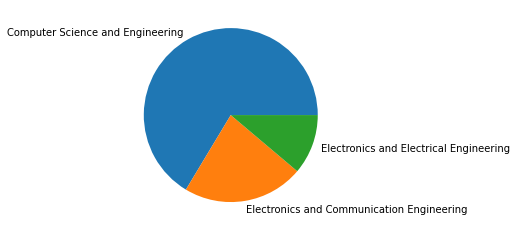

In [22]:
value = data.groupby(['Department'], as_index=False)['CodeKata Score'].sum()
value
x = np.array(value['CodeKata Score'])
y = list(value['Department'])
plt.pie(x, labels = y)
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

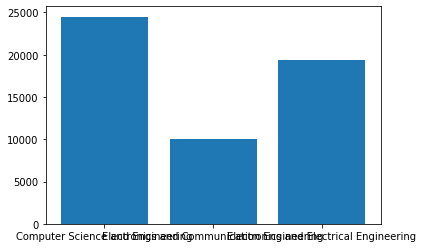

,Department,CodeKata Score
0,Computer Science and Engineering,24500
1,Electronics and Communication Engineering,10040
2,Electronics and Electrical Engineering,19400


In [23]:
Bar = data.groupby(['Department'], as_index=False)['CodeKata Score'].max()
Bar
x1 = np.array(Bar['CodeKata Score'])
y1 = np.array(Bar['Department'])
plt.bar(y1, x1)
plt.show()
Bar